# FBB Pretty good! good that you remove my instructions and describe what you do cell by cell
# clean coding, good captions for the most part.
# All figures are too small, all descriptiona captions labels are too small!

# look for cells with "FBB" for more comments 


In [13]:
import seaborn
import scipy.stats
import numpy as np
import matplotlib.pylab as pl
import pandas as pd
import statsmodels.formula.api as sm
%matplotlib inline

# Gender Income Gap
## 1. Create Dictionaries

In [2]:
allmales = {}
allfemales = {}
# FBB while hard coding all the links work you can construct them with a for loop. See my solution

allmales['All'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls', header = 9).dropna()
allmales['White'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls', header = 9).dropna()
allmales['Black'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls', header = 9).dropna()
allmales['Asian'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls', header = 9).dropna()
allmales['Hispanic'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls', header = 9).dropna()

allfemales['All'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls', header = 9).dropna()
allfemales['White'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls', header = 9).dropna()
allfemales['Black'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls', header = 9).dropna()
allfemales['Asian'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls', header = 9).dropna()
allfemales['Hispanic'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_9.xls', header = 9).dropna()

In [3]:
for gender in [allfemales, allmales]:
    for pop in gender:
        for c in gender[pop].columns:
            if c != 'Characteristic':
                gender[pop][c] = pd.to_numeric(gender[pop][c], errors='coerce')

## 2. Descriptive Phase

In [4]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

('#####', 'Hispanic')
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%            49.000000              7.500000          6.750000   
50%           332.000000             72.000000         41.000000   
75%          1888.750000            268.500000        188.500000   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%            6.000000          2.25000

/Users/JordanVani/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%           666.250000            136.000000         71.250000   
50%          3769.500000            773.500000        585.000000   
75%         23899.750000           1655.500000       1309.000000   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%           68.000000         51.000000           50.500000 

## 3. Exploratory Phase

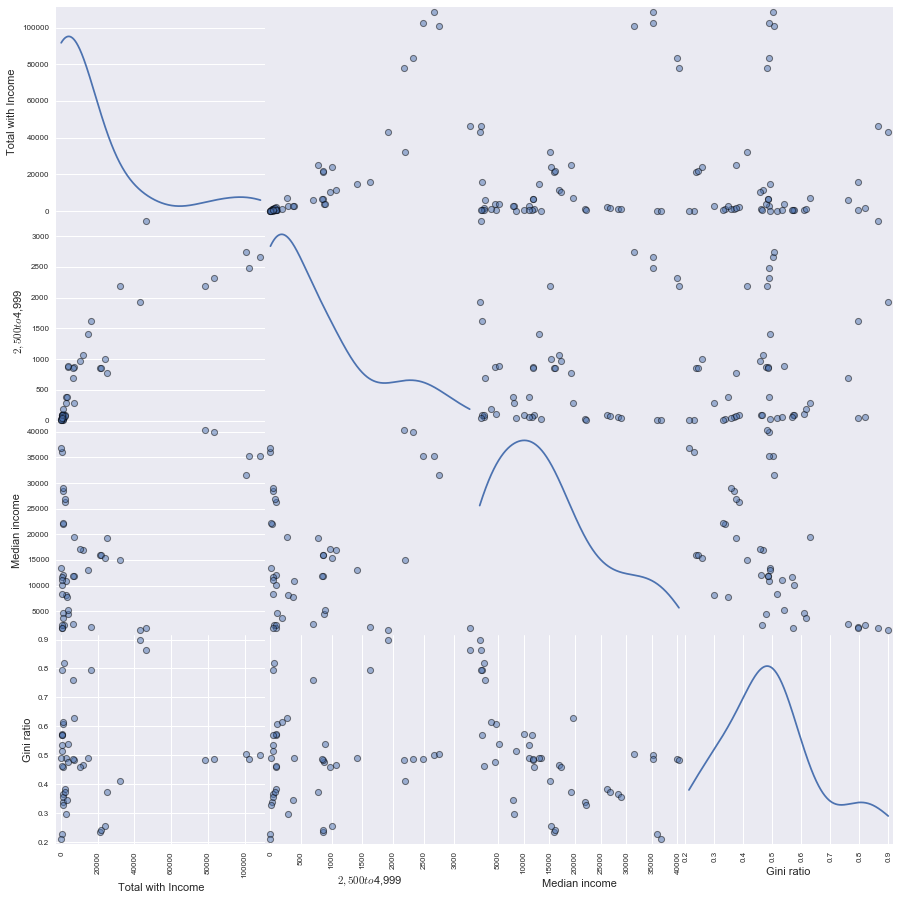

In [5]:
figallmale = pd.scatter_matrix(allmales['All']
                   [[u'Total with Income', u'$2,500 to $4,999', u'Median income', u'Gini ratio']],
                   linewidth= 1, s=150, figsize=(15, 15), diagonal='kde')

#### Figure 1. Scatter Matrix of All Male Income Data
# FBB caption should be more descriptive

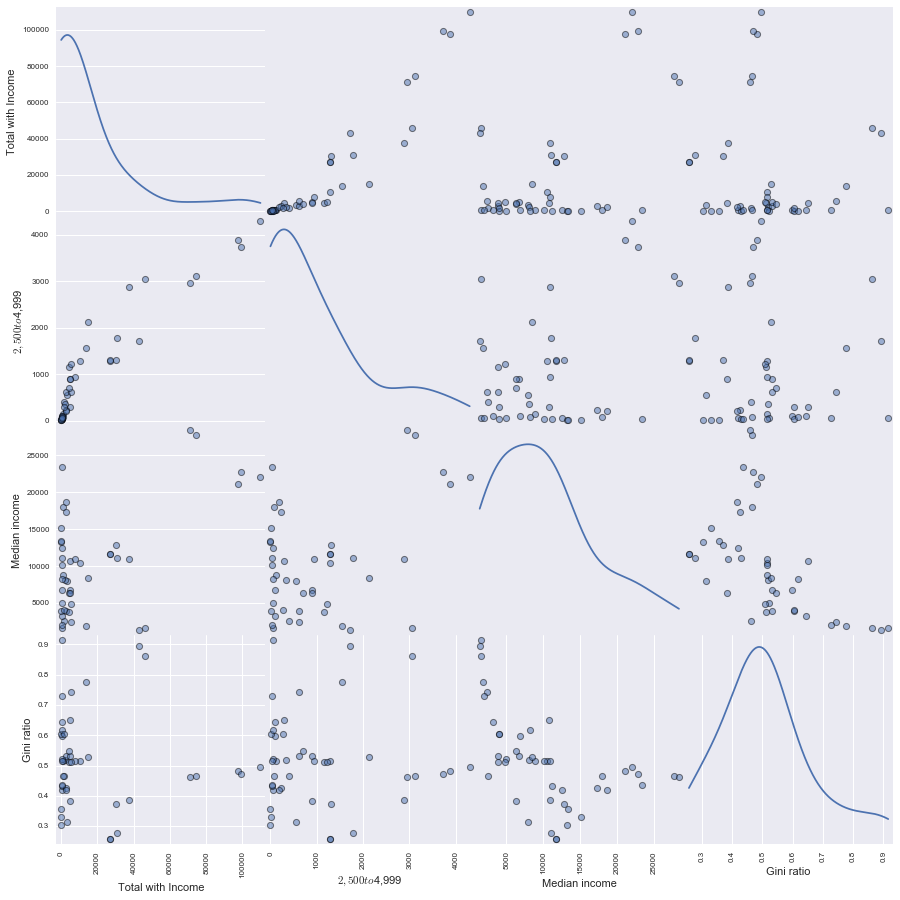

In [6]:
figallfemale = pd.scatter_matrix(allfemales['All']
                   [[u'Total with Income', u'$2,500 to $4,999', u'Median income', u'Gini ratio']],
                   linewidth= 1, s=150, figsize=(15, 15), diagonal='kde')

#### Figure 2. Scatter Matrix of All Female Income Data

## 4. See how male & female income relate to each other.
#### Plot the total median income of females vs total median income of males, race by race.

In [7]:
race = ['All', 'White', 'Black', 'Hispanic', 'Asian']
femalesmedian = []
malesmedian = []
[femalesmedian.append(allfemales[k]['Median income'][1]) for k in race]
[malesmedian.append(allmales[k]['Median income'][1]) for k in race]

df = pd.DataFrame()
df['race'] = race
df['fmedian'] = femalesmedian
df['mmedian'] = malesmedian
df['color'] = ['b','r','g','orange', 'purple']

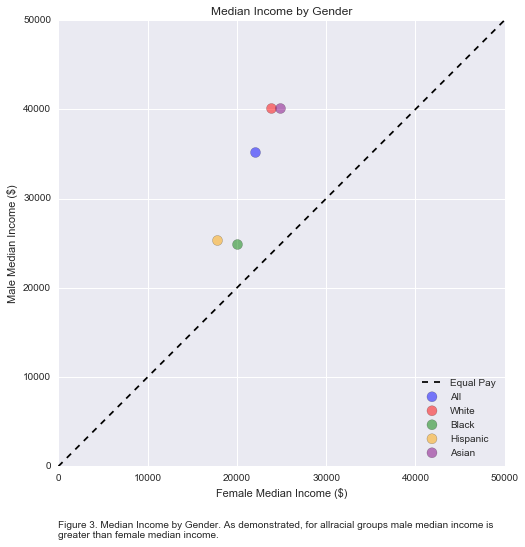

In [8]:
fig, (ax) = pl.subplots(nrows = 1, ncols = 1, figsize = (8,8))
for x, item in enumerate(df.race):
    ax.scatter(df.fmedian[x], df.mmedian[x], alpha=0.5, s = 100, c = df.color[x], label = df.race[x])
ax.plot(range(0,50000), range(0, 50000), c = 'k', label = "Equal Pay", linestyle = 'dashed')
ax.axis([0, 50000, 0, 50000])
ax.set_xlabel('Female Median Income ($)')
ax.set_ylabel('Male Median Income ($)')
ax.set_title('Median Income by Gender')
ax.text(0, -8000, "Figure 3. Median Income by Gender. As demonstrated, for all\
racial groups male median income is \ngreater than female median income.")
ax.legend(loc = 'lower right')

# FBB as demonstrated -> by the fact that all datapoints sit above the equality line

## 5. Calculate Line of Best Fit

In [9]:
results1 = sm.ols('mmedian ~ fmedian', data = df).fit()
regressx = np.linspace(0,50000, 1000)
regressy = regressx*results1.params[1]+results1.params[0]
cor = scipy.stats.spearmanr(df.fmedian, df.mmedian)
beta1 = cor[0] * df.mmedian.std() / df.fmedian.std()
beta0 = df.mmedian.mean() - beta1 * df.fmedian.mean()
betay = beta1*regressx+beta0

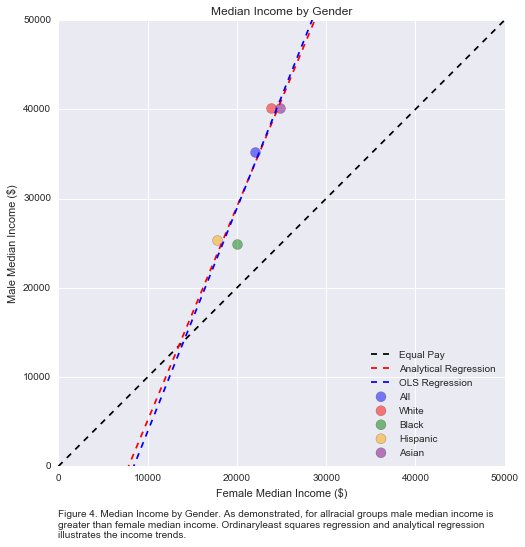

In [10]:
fig, (ax) = pl.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.plot(range(0,50000), range(0, 50000), c = 'k', label = "Equal Pay", linestyle = 'dashed')
ax.plot(regressx, betay, c = 'r', label = "Analytical Regression", linestyle = 'dashed')
ax.plot(regressx, regressy, c = 'b', label = "OLS Regression", linestyle = 'dashed')
for x, item in enumerate(df.race):
    ax.scatter(df.fmedian[x], df.mmedian[x], alpha=0.5, s = 100, c = df.color[x], label = df.race[x])
ax.axis([0, 50000, 0, 50000])
ax.set_xlabel('Female Median Income ($)')
ax.set_ylabel('Male Median Income ($)')
ax.set_title('Median Income by Gender')
ax.text(0, -8000, "Figure 4. Median Income by Gender. As demonstrated, for all\
racial groups male median income is \ngreater than female median income. Ordinary\
least squares regression and analytical regression \nillustrates the income trends.")
ax.legend(loc = 'lower right')

## 6. Now Include All Income Types 

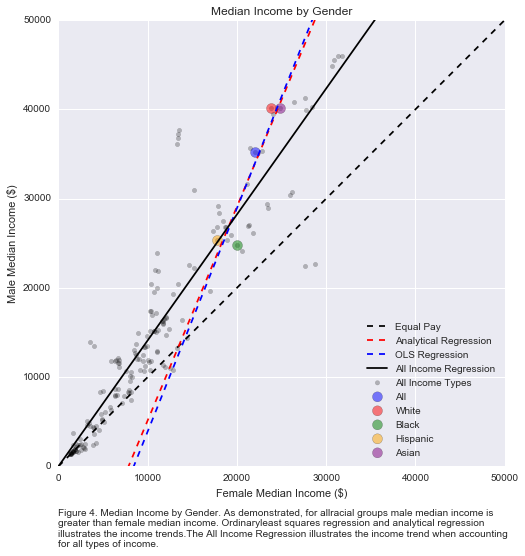

In [11]:
femalesmedianall = []
malesmedianall = []
[femalesmedianall.append(allfemales[k]['Median income'][:].values) for k in race]
[malesmedianall.append(allmales[k]['Median income'][:].values) for k in race]

fmedall = [item for x in femalesmedianall for item in x]
mmedall = [item for x in malesmedianall for item in x]

df1 = pd.DataFrame()
df1['fmedall'] = fmedall
df1['mmedall'] = mmedall

results2 = sm.ols('mmedall ~ fmedall', data = df1).fit()
rx = np.linspace(0,50000, 1000)
ry = rx*results2.params[1]+results2.params[0]

fig, (ax) = pl.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax.plot(range(0,50000), range(0, 50000), c = 'k', label = "Equal Pay", linestyle = 'dashed')
ax.plot(regressx, betay, c = 'r', label = "Analytical Regression", linestyle = 'dashed')
ax.plot(regressx, regressy, c = 'b', label = "OLS Regression", linestyle = 'dashed')
ax.plot(rx, ry, c = 'k', label = "All Income Regression")
ax.scatter(df1.fmedall, df1.mmedall, alpha=0.25, s = 20, c = 'k', label = "All Income Types")
for x, item in enumerate(df.race):
    ax.scatter(df.fmedian[x], df.mmedian[x], alpha=0.5, s = 100, c = df.color[x], label = df.race[x])
ax.axis([0, 50000, 0, 50000])
ax.set_xlabel('Female Median Income ($)')
ax.set_ylabel('Male Median Income ($)')
ax.set_title('Median Income by Gender')
ax.text(0, -9000, "Figure 4. Median Income by Gender. As demonstrated, for all\
racial groups male median income is \ngreater than female median income. Ordinary\
least squares regression and analytical regression \nillustrates the income trends.\
The All Income Regression illustrates the income trend when accounting \nfor all \
types of income.")
ax.legend(loc = 'lower right')

# FBB Why do the line fit through all datapoints look so different? because (0,0) is included. 
This should have been discussed

## 6. Predictions (where men earn $30,000)
#### All Income Regression (y = 1.411x -2.517) 

In [12]:
print (30000-results2.params[0])/results2.params[1]

21263.7311958


##### Using the All Income regression, a woman's salary is predicted to be \$21,264 where a man's would be \$30,000.
## 7. What does this analysis tell us about race?
This analysis present two clusters between the racial groups presented here. Here, Asian and White individuals are clustered together and out earn the Black and Hispanic cluster by a large margin. Within these clusters, Asian women out earn white women, and black women out earn hispanic women. Across all groups, men out earn women. Lastly, when examining the racial groups compared to the 'All Income Regression,' the black population is the only one who lands on the female side of the regression.

# FBB the covariance between ethnicity and income may invalidate the analsys (see my solution)